In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import datetime as dt

In [2]:
# PARAMETROS DEL PORTAFOLIO 
stocks = ["AAPL","MSFT","NVDA","AMZN"]
weights = np.array([0.25,0.25,0.25,0.25])

if not np.isclose(weights.sum(),1):
    raise ValueError("Los pesos deben sumar 1")

end = dt.datetime.now()
start = end - dt.timedelta(days=365*3)

In [4]:
#DESCARAGA DE LOS PRECIOS HISTORICOS 
prices = yf.download(stocks,start=start,end=end,progress=False)["Close"]
returns = prices.pct_change().dropna()

mean_returns = returns.mean()
cov_matrix = returns.cov()

print("Media diaria retornos:")
print(mean_returns)
print("\\nMatriz de covarianza:")
print(cov_matrix)

Media diaria retornos:
Ticker
AAPL    0.000917
AMZN    0.001201
MSFT    0.000741
NVDA    0.003407
dtype: float64
\nMatriz de covarianza:
Ticker      AAPL      AMZN      MSFT      NVDA
Ticker                                        
AAPL    0.000263  0.000144  0.000106  0.000179
AMZN    0.000144  0.000387  0.000167  0.000272
MSFT    0.000106  0.000167  0.000221  0.000237
NVDA    0.000179  0.000272  0.000237  0.000967


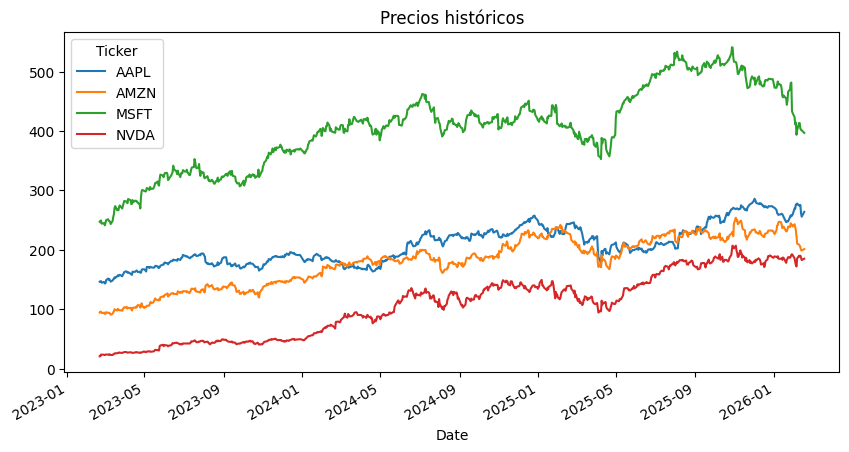

In [5]:
# VISUALIX=ZACION 
prices.plot(figsize=(10,5),title="Precios históricos")
plt.show()

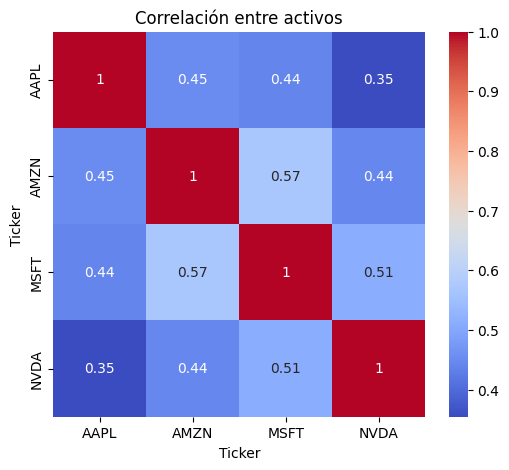

In [6]:
#CORRELACION ENTRE ACTIVOS 
plt.figure(figsize=(6,5))
sns.heatmap(returns.corr(),annot=True,cmap="coolwarm")
plt.title("Correlación entre activos")
plt.show()


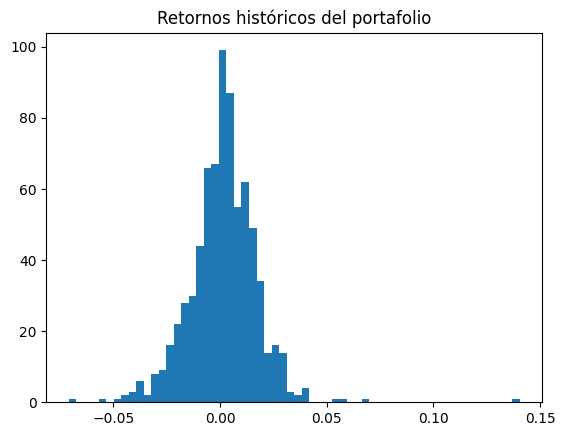

Volatilidad histórica diaria: 0.01589840023924791


In [7]:
# RETORNOS HISTORICOS 
portfolio_hist = returns.dot(weights)

plt.hist(portfolio_hist,bins=60)
plt.title("Retornos históricos del portafolio")
plt.show()

print("Volatilidad histórica diaria:", portfolio_hist.std())

In [9]:
# SIMULACION  DE MONTECARLO 
num_sim = 5000
num_days = 252
k = len(stocks)

L = np.linalg.cholesky(cov_matrix)
portfolio_paths = np.zeros((num_days,num_sim))

In [10]:
# simulacion de  trayectorias
for m in range(num_sim):

    Z = np.random.normal(size=(num_days,k))
    correlated = Z @ L.T
    daily_returns = correlated + mean_returns.values
    port_daily = daily_returns @ weights
    portfolio_paths[:,m] = np.cumprod(1+port_daily)

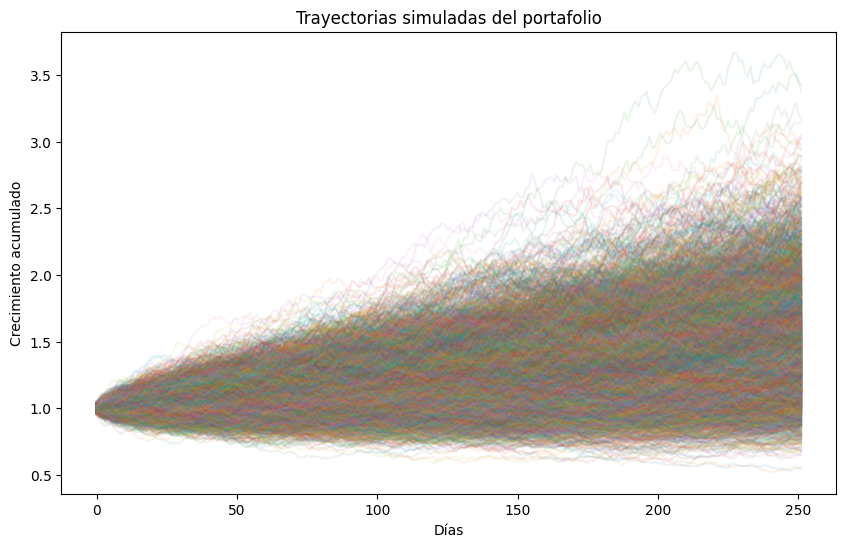

In [11]:
# Visualización de trayectorias
plt.figure(figsize=(10,6))
plt.plot(portfolio_paths,alpha=0.1)
plt.title("Trayectorias simuladas del portafolio")
plt.xlabel("Días")
plt.ylabel("Crecimiento acumulado")
plt.show()

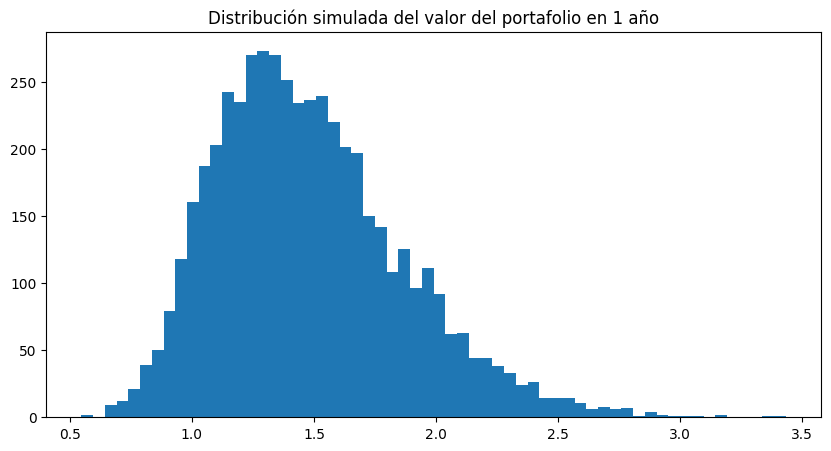

Valor esperado final: 1.4802744683455573
Probabilidad de pérdida: 0.0782


In [12]:

#8. Distribución final del portafolio
final_values = portfolio_paths[-1]

plt.figure(figsize=(10,5))
plt.hist(final_values,bins=60)
plt.title("Distribución simulada del valor del portafolio en 1 año")
plt.show()

print("Valor esperado final:", final_values.mean())
print("Probabilidad de pérdida:", np.mean(final_values<1))

# portafolio B 


In [19]:
# cambio de los pesos y los activos 
stocks2 = ["KO","GOOGL","TSLA","MSFT"]
weights2 = np.array([0.30,0.25,0.15,0.30])

if not np.isclose(weights2.sum(),1):
    raise ValueError("Los pesos deben sumar 1")

end = dt.datetime.now()
start = end - dt.timedelta(days=365*3)

In [20]:
prices2 = yf.download(stocks2,start=start,end=end,progress=False)["Close"]
returns2 = prices2.pct_change().dropna()

mean_returns2 = returns2.mean()
cov_matrix2 = returns2.cov()

print("Media diaria retornos:")
print(mean_returns2)
print("\\nMatriz de covarianza:")
print(cov_matrix2)

Media diaria retornos:
Ticker
GOOGL    0.001769
KO       0.000546
MSFT     0.000741
TSLA     0.001651
dtype: float64
\nMatriz de covarianza:
Ticker     GOOGL        KO      MSFT      TSLA
Ticker                                        
GOOGL   0.000336 -0.000008  0.000119  0.000262
KO     -0.000008  0.000088 -0.000005 -0.000022
MSFT    0.000119 -0.000005  0.000221  0.000193
TSLA    0.000262 -0.000022  0.000193  0.001362


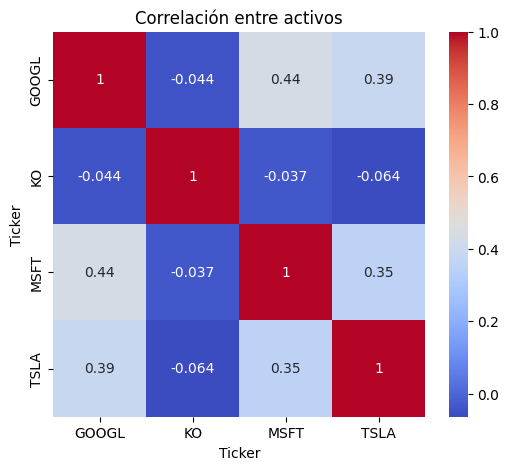

In [21]:
plt.figure(figsize=(6,5))
sns.heatmap(returns2.corr(),annot=True,cmap="coolwarm")
plt.title("Correlación entre activos")
plt.show()


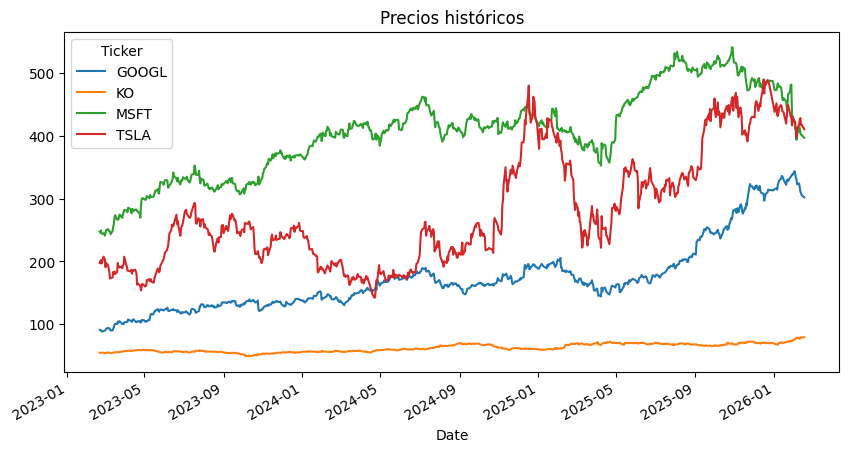

In [22]:
# VISUALIX=ZACION 
prices2.plot(figsize=(10,5),title="Precios históricos")
plt.show()

Responder en comentarios en Markdown:

¿Las trayectorias simuladas son similares entre sí o muy distintas?
Pue en este segundo portafolio lo que son GOOGLE y MICROSOFT sus trayectorios  sin similares lo cual es coherente ya que en la matriz de correlacion su correlacion es alta por lo tanto es congruente que sus trayectoria sea similar pues asi como sube una en funcion tambien sube la otra en un 0.44 %.

¿La dispersión aumenta con el tiempo? si pues en general como estamos tomando un punto en el tiempo para cada activo conforme pasa el tiempo la dsipersion de sus rendimeintos si se va abriendo mas a los lados distanciandose uno del otro.

¿Qué observas en la distribución final del portafolio?
la distribucion es relativamente norma pero si exosten datos mas pesados considerados outliers concentardos en la cola derecha, lo cual indica que sus rendimeintos estan siewndo buenos pues la sitribucion justo es de los rendimeinto .

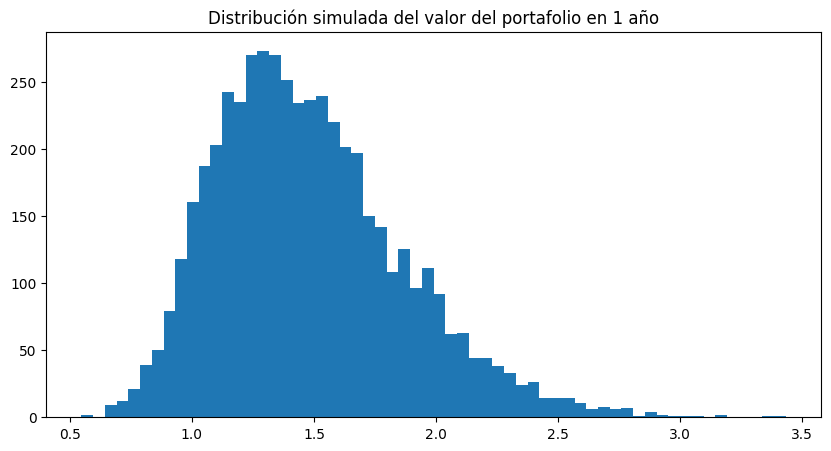

Valor esperado final: 1.4802744683455573
Probabilidad de pérdida: 0.0782


In [26]:
final_values2 = portfolio_paths[-1]

plt.figure(figsize=(10,5))
plt.hist(final_values2,bins=60)
plt.title("Distribución simulada del valor del portafolio en 1 año")
plt.show()

print("Valor esperado final:", final_values2.mean())
print("Probabilidad de pérdida:", np.mean(final_values2<1))